# Accessing non-SNOTEL met site data from the SnowEx period

## imports

In [2]:
%%capture
!pip install git+https://github.com/friedrichknuth/driveanon.git
    
import driveanon
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## load in datasets, format, and append to single dataframe

In [4]:
#for accessing google drive data, blob ids and downloading
blob_ids = ['1Ioh1huZZpIJLRtoyGvWZfvJkaSQh0-QS', #to get site locations
            '1YT9bNveID55Lo5j4upMGrA7vEl5FWXp_', #Mesa West .csv
            '1v2zUMtjBSohk0OX6WCirZYkddysLiZY7', #GMSP .csv
            '1cwIsJQ5kCVcHpw6pRgywf6TKsmeg2RZC' #Mesa East .csv
            ] 
            #'', 
            #'' ] #Mesa Middle .csv
    
for blob_id in blob_ids:
    f = driveanon.save(blob_id)

In [5]:
#load in csv files and trim to relevant variables
files = ['MW-V7_clean.csv','GMSP-V2.csv','ME-V3.csv']
cols = ['station_id','Datetime_UTC','latitude','longitude','AirTC_10ft_Avg_C','IRtarget_nadir2_C_Avg','SnowDepth_m',
        'TCstringC_s50cm_Avg','TCstringC_s10cm_Avg','TCstringC_0cm_Avg',
        'TCstringC_10cm_Avg','TCstringC_50cm_Avg','TCstringC_100cm_Avg',
        'TCstringC_200cm_Avg'];

#date range for trimming
start_date = datetime.datetime(2020,1,1,0,0)
end_date = datetime.datetime(2020,3,31,23,59)

DF = pd.DataFrame(columns=cols)
for file in files:
    station = file[:-4]
    
    #hard coded this in cause I ran out of patience
    if station[:2] == 'GM':
        lat = 39.05084
        lon = -108.06144
    elif station[:2] == 'MM':
        lat = 39.03954
        lon = -107.94174
    elif station[:2] == 'ME':
        lat = 39.10358
        lon = -107.88383
    elif station[:2] == 'MW':
        lat = 39.03388
        lon = -108.21399
        
    df = pd.read_csv('./'+file)
    
    #converts any NAN text to NaN and numeric columns (fixes error raised)
    for (columnName, columnData) in df.iteritems():
        df[columnName] = pd.to_numeric(df[columnName],errors='coerce')
    
    #create and add site column
    df.insert(0,'station_id',station)
    
    #add 
    df.insert(1, 'latitude', lat)
    df.insert(2, 'longitude', lon)
    
    #create and add datetime column
    full_dates = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=df['Day'], hour = df['Hour'], minute = df['Minute']))
    df.insert(3, 'Datetime_UTC', full_dates)
    
    #trim to study period (January - March 2020)
    mask = (df['Datetime_UTC'] > start_date) & (df['Datetime_UTC'] <= end_date)
    df = df.loc[mask]
    
    #trim to necessary columns
    df = df[cols]
    
    #append data frame
    DF = DF.append(df, ignore_index=True)
    
DF.shape

/srv/conda/envs/notebook/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/srv/conda/envs/notebook/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/srv/conda/envs/notebook/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (11,22,23,24,25,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types.Specify dtype

(29934, 14)

## Use DF dataframe to add sites to plot (3 unique sites), and add to ERA comparison plots

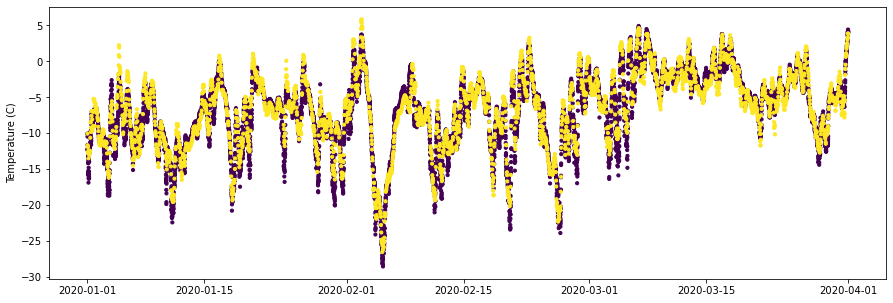

In [21]:
colors = {'MW-V7_clean':1, 'GMSP-V2.csv':2, 'ME-V3':3}
#DF['station_id'].map(colors)
plt.figure(figsize=(15,5))
plt.scatter(DF['Datetime_UTC'],DF['AirTC_10ft_Avg_C'],c=DF['station_id'].map(colors),s=10)
plt.ylabel('Temperature (C)')
#plt.legend()
plt.show()